In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mat
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
DataFrame=pd.read_csv('adult.csv')
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
           'marital_status', 'occupation', 'relationship', 'race', 'sex',
           'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
DataFrame.columns = columns
DataFrame

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
DataFrame.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [4]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
DataFrame.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
DataFrame.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [7]:
for column in DataFrame.select_dtypes(include='object').columns:
    print(column, DataFrame[column].unique())

workclass [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital_status [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv']
relationship [' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex [' Male' ' Female']
native_country [' United-States' ' Cuba' ' Jamaica' ' India' 

# HIST

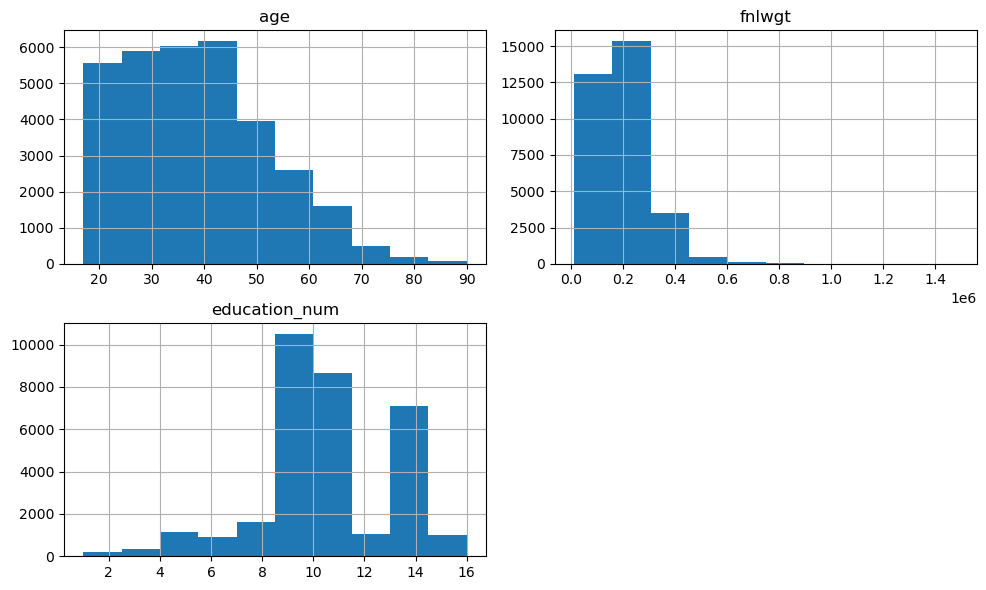

In [8]:
col = ['age', 'fnlwgt', 'education_num']
DataFrame[col].hist(bins=10, figsize=(10,6), label=col)
plt.tight_layout()
plt.show()

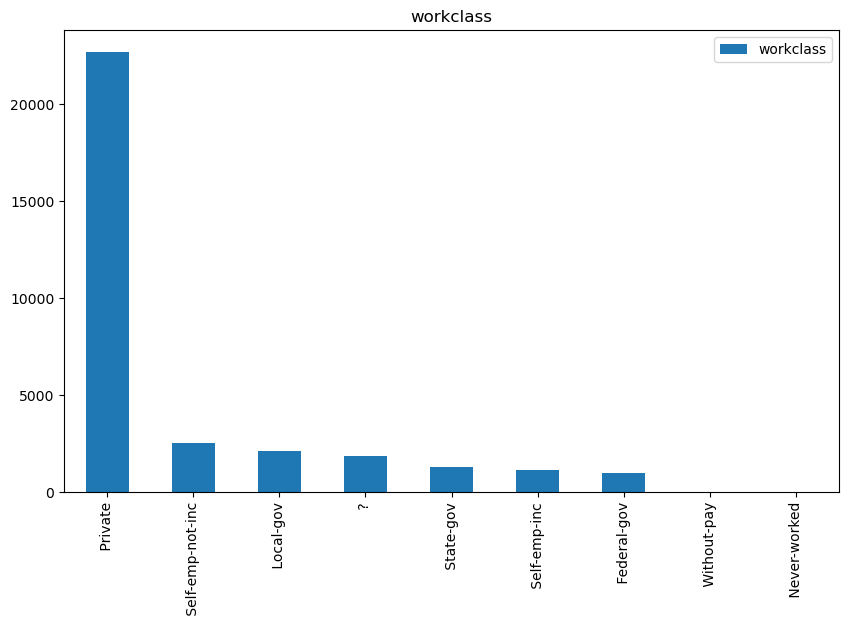

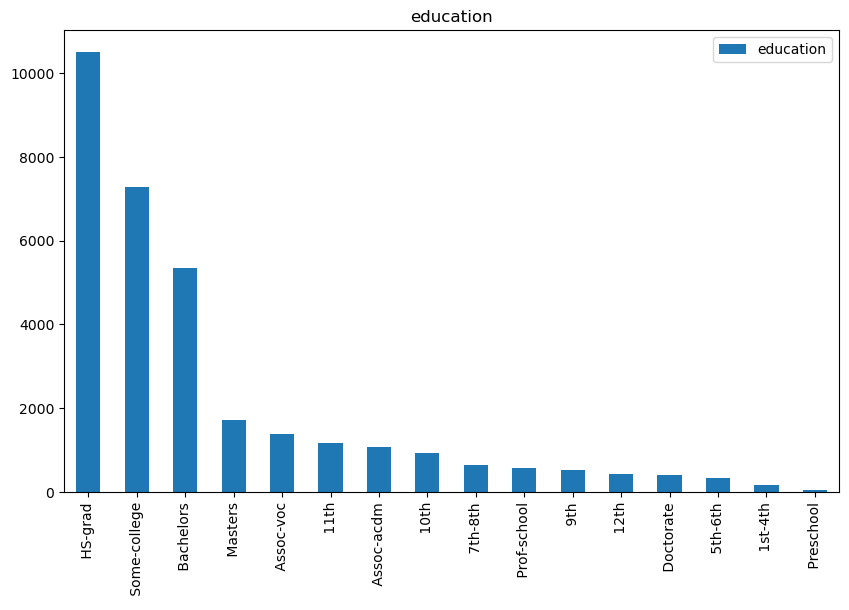

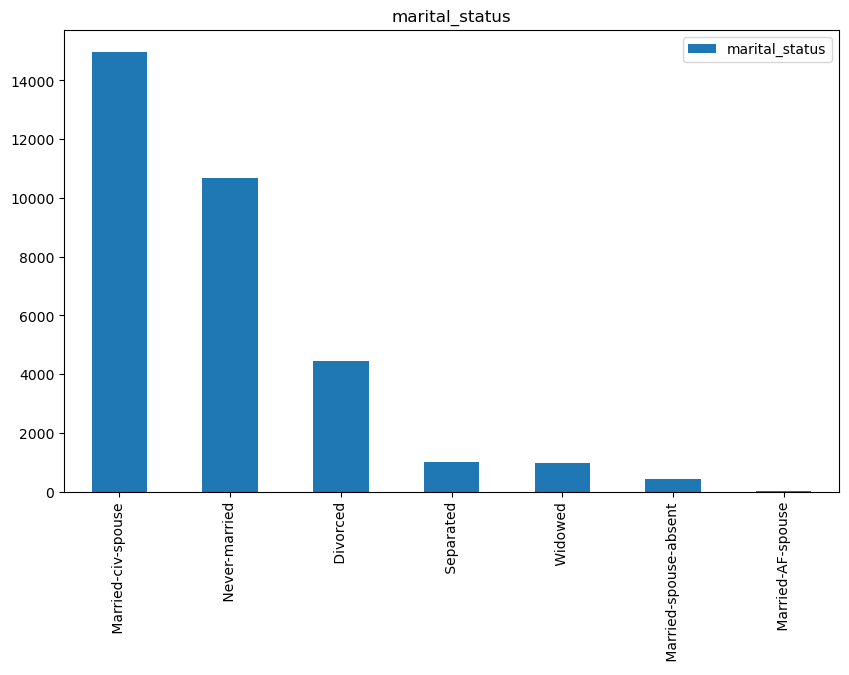

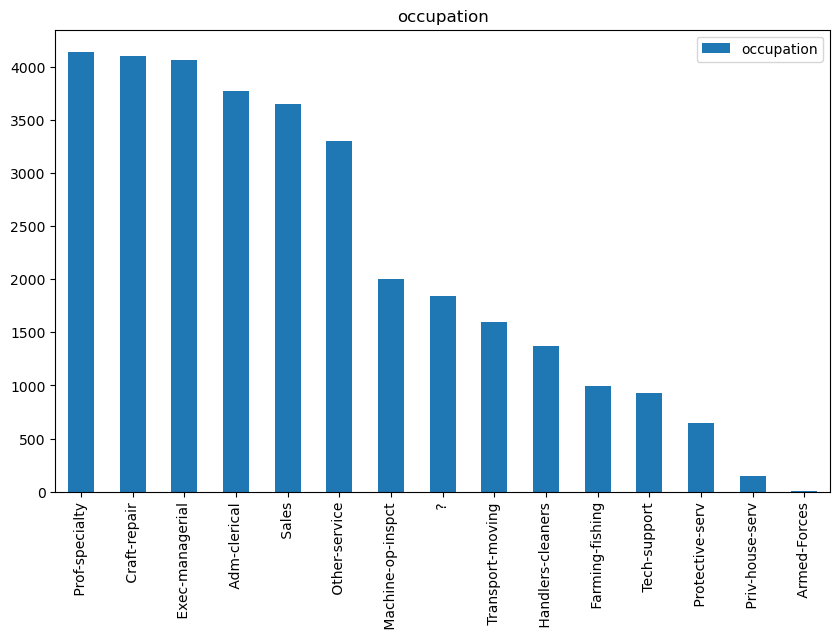

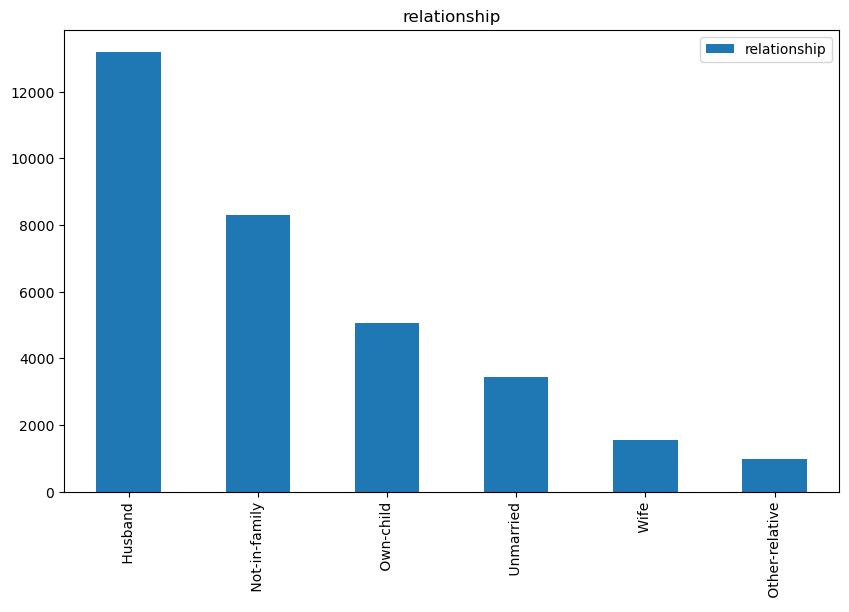

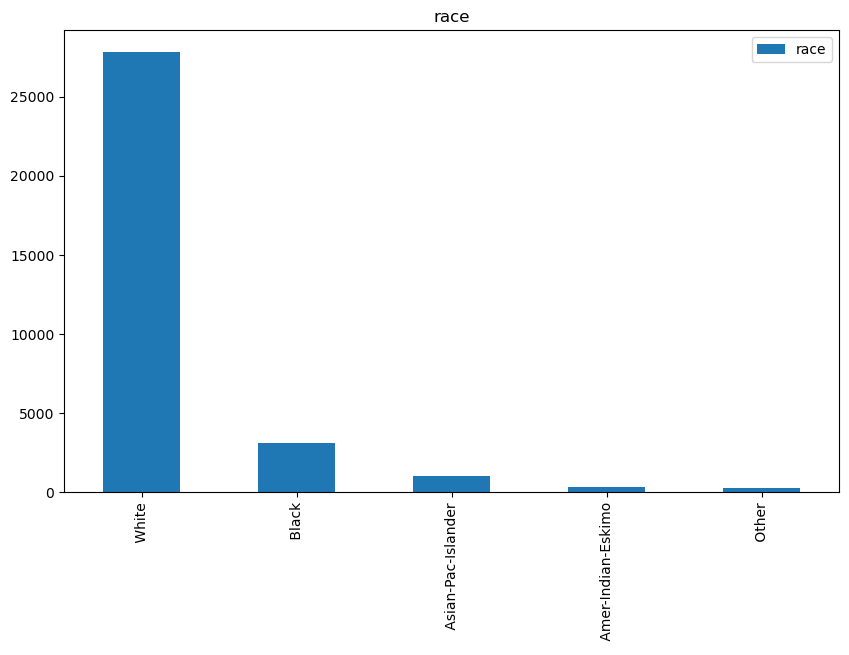

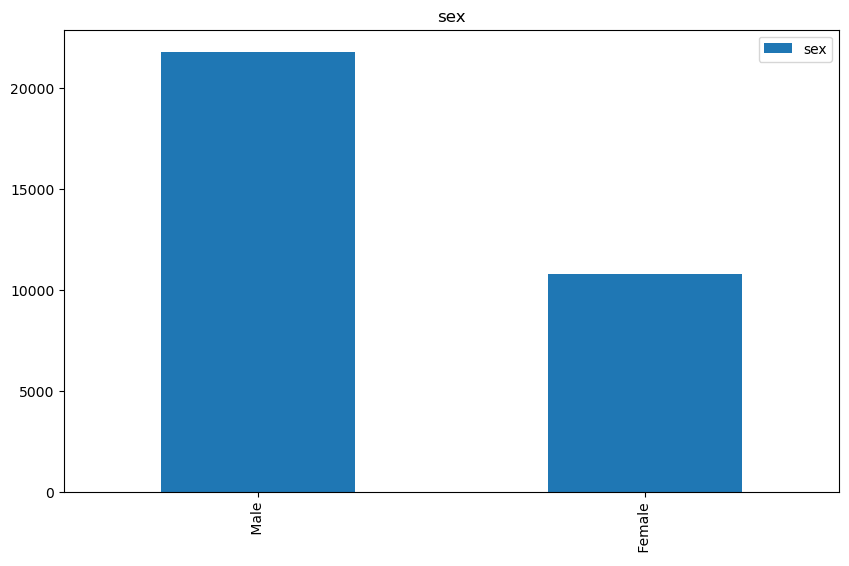

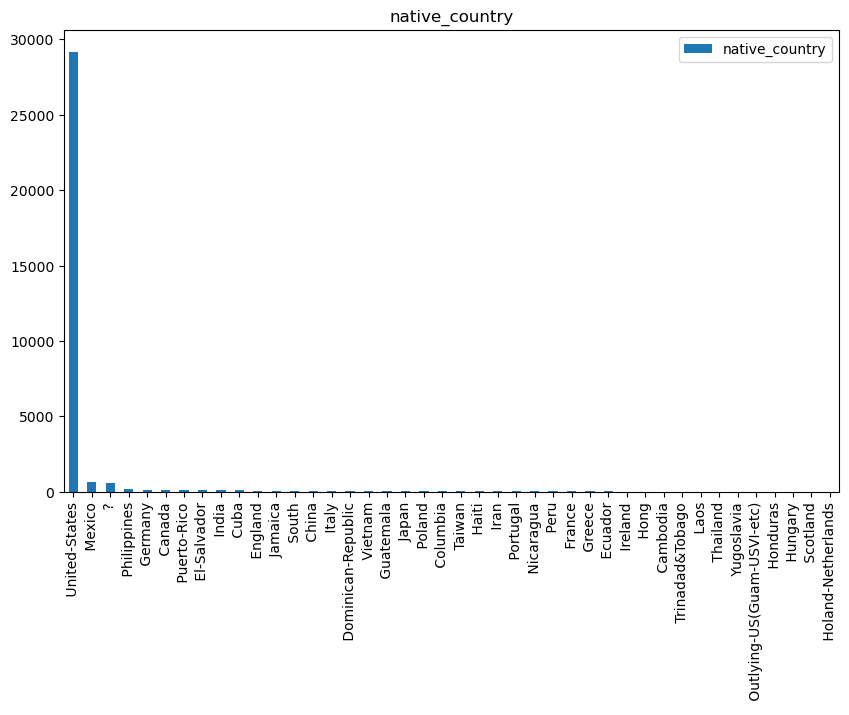

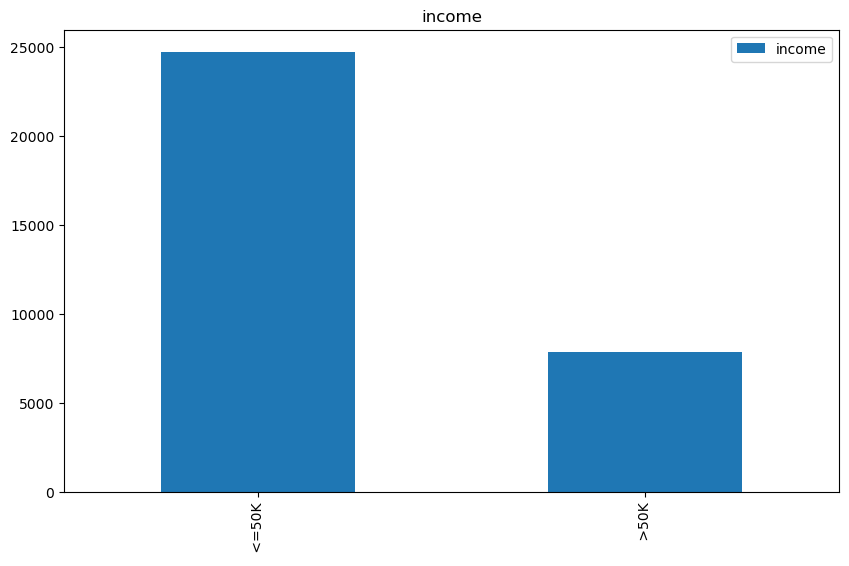

In [9]:
for column in DataFrame.select_dtypes(include='object').columns:
    value_counts = DataFrame[column].value_counts()
    value_counts.plot(kind='bar', figsize=(10, 6), label=column)
    plt.title(column)
    plt.legend()
    plt.show()

# DOT

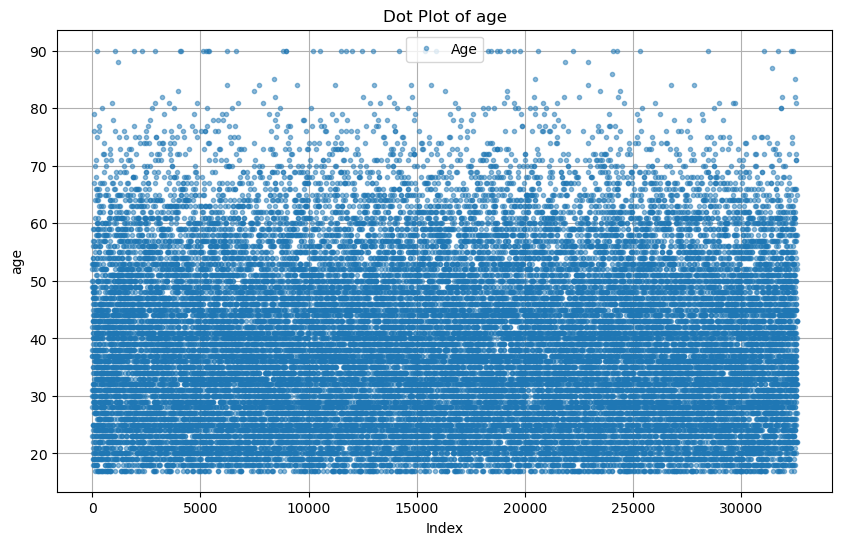

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(DataFrame['age'], 'o', markersize=3, alpha=0.5, label='Age')
plt.title('Dot Plot of age')
plt.xlabel('Index')
plt.ylabel('age')
plt.grid(True)
plt.legend()
plt.show()

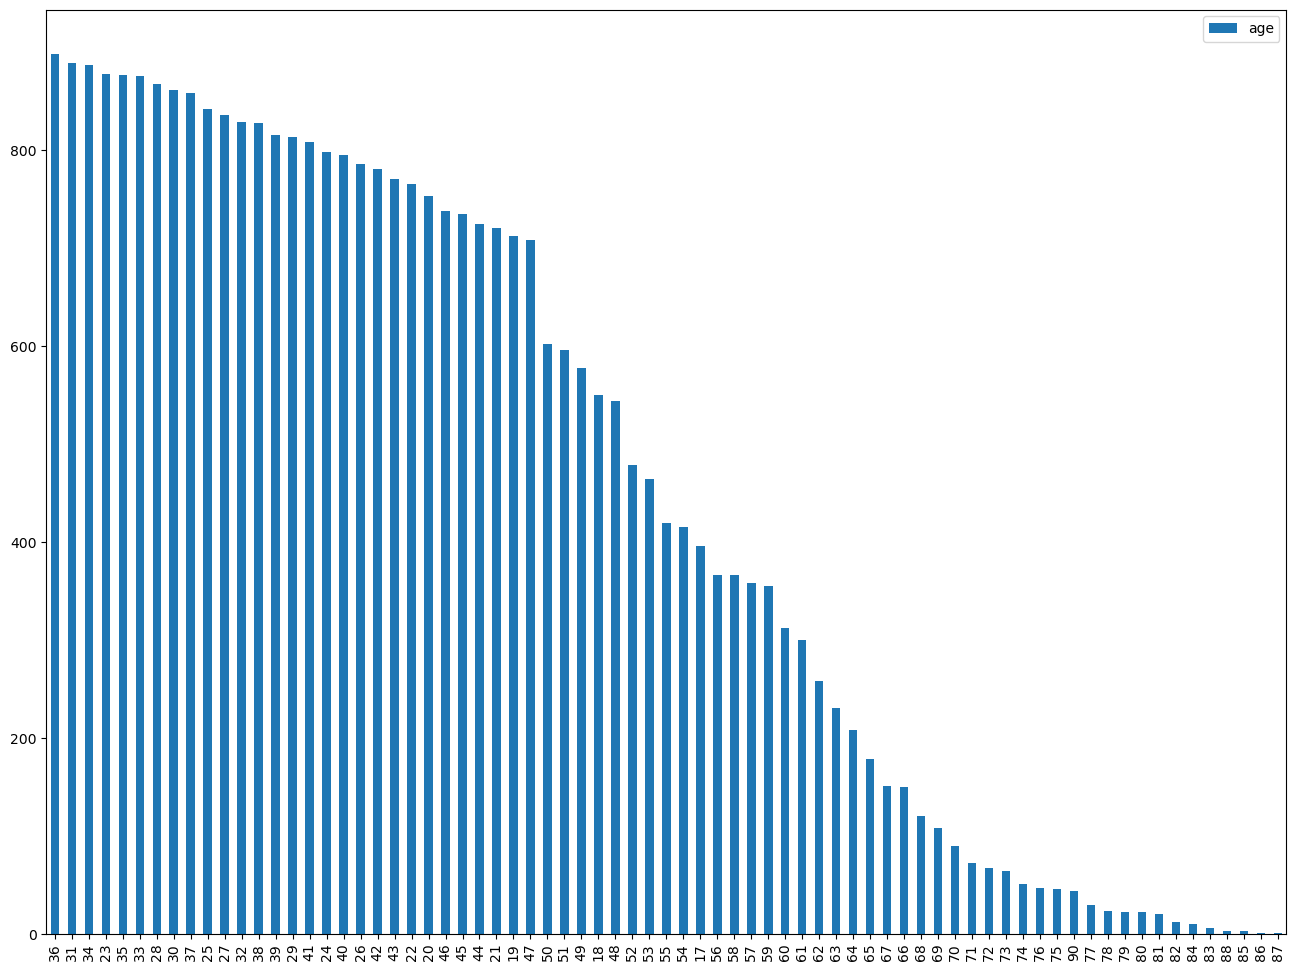

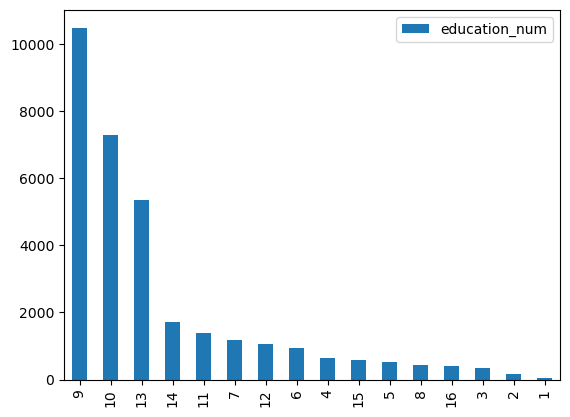

In [11]:
col = ['age', 'education_num']

# Creating a larger figure
plt.figure(figsize=(16,12))  # Adjust the dimensions as needed

for c in col:
    DataFrame[c].value_counts().plot(kind='bar')
    plt.legend()
    plt.show()

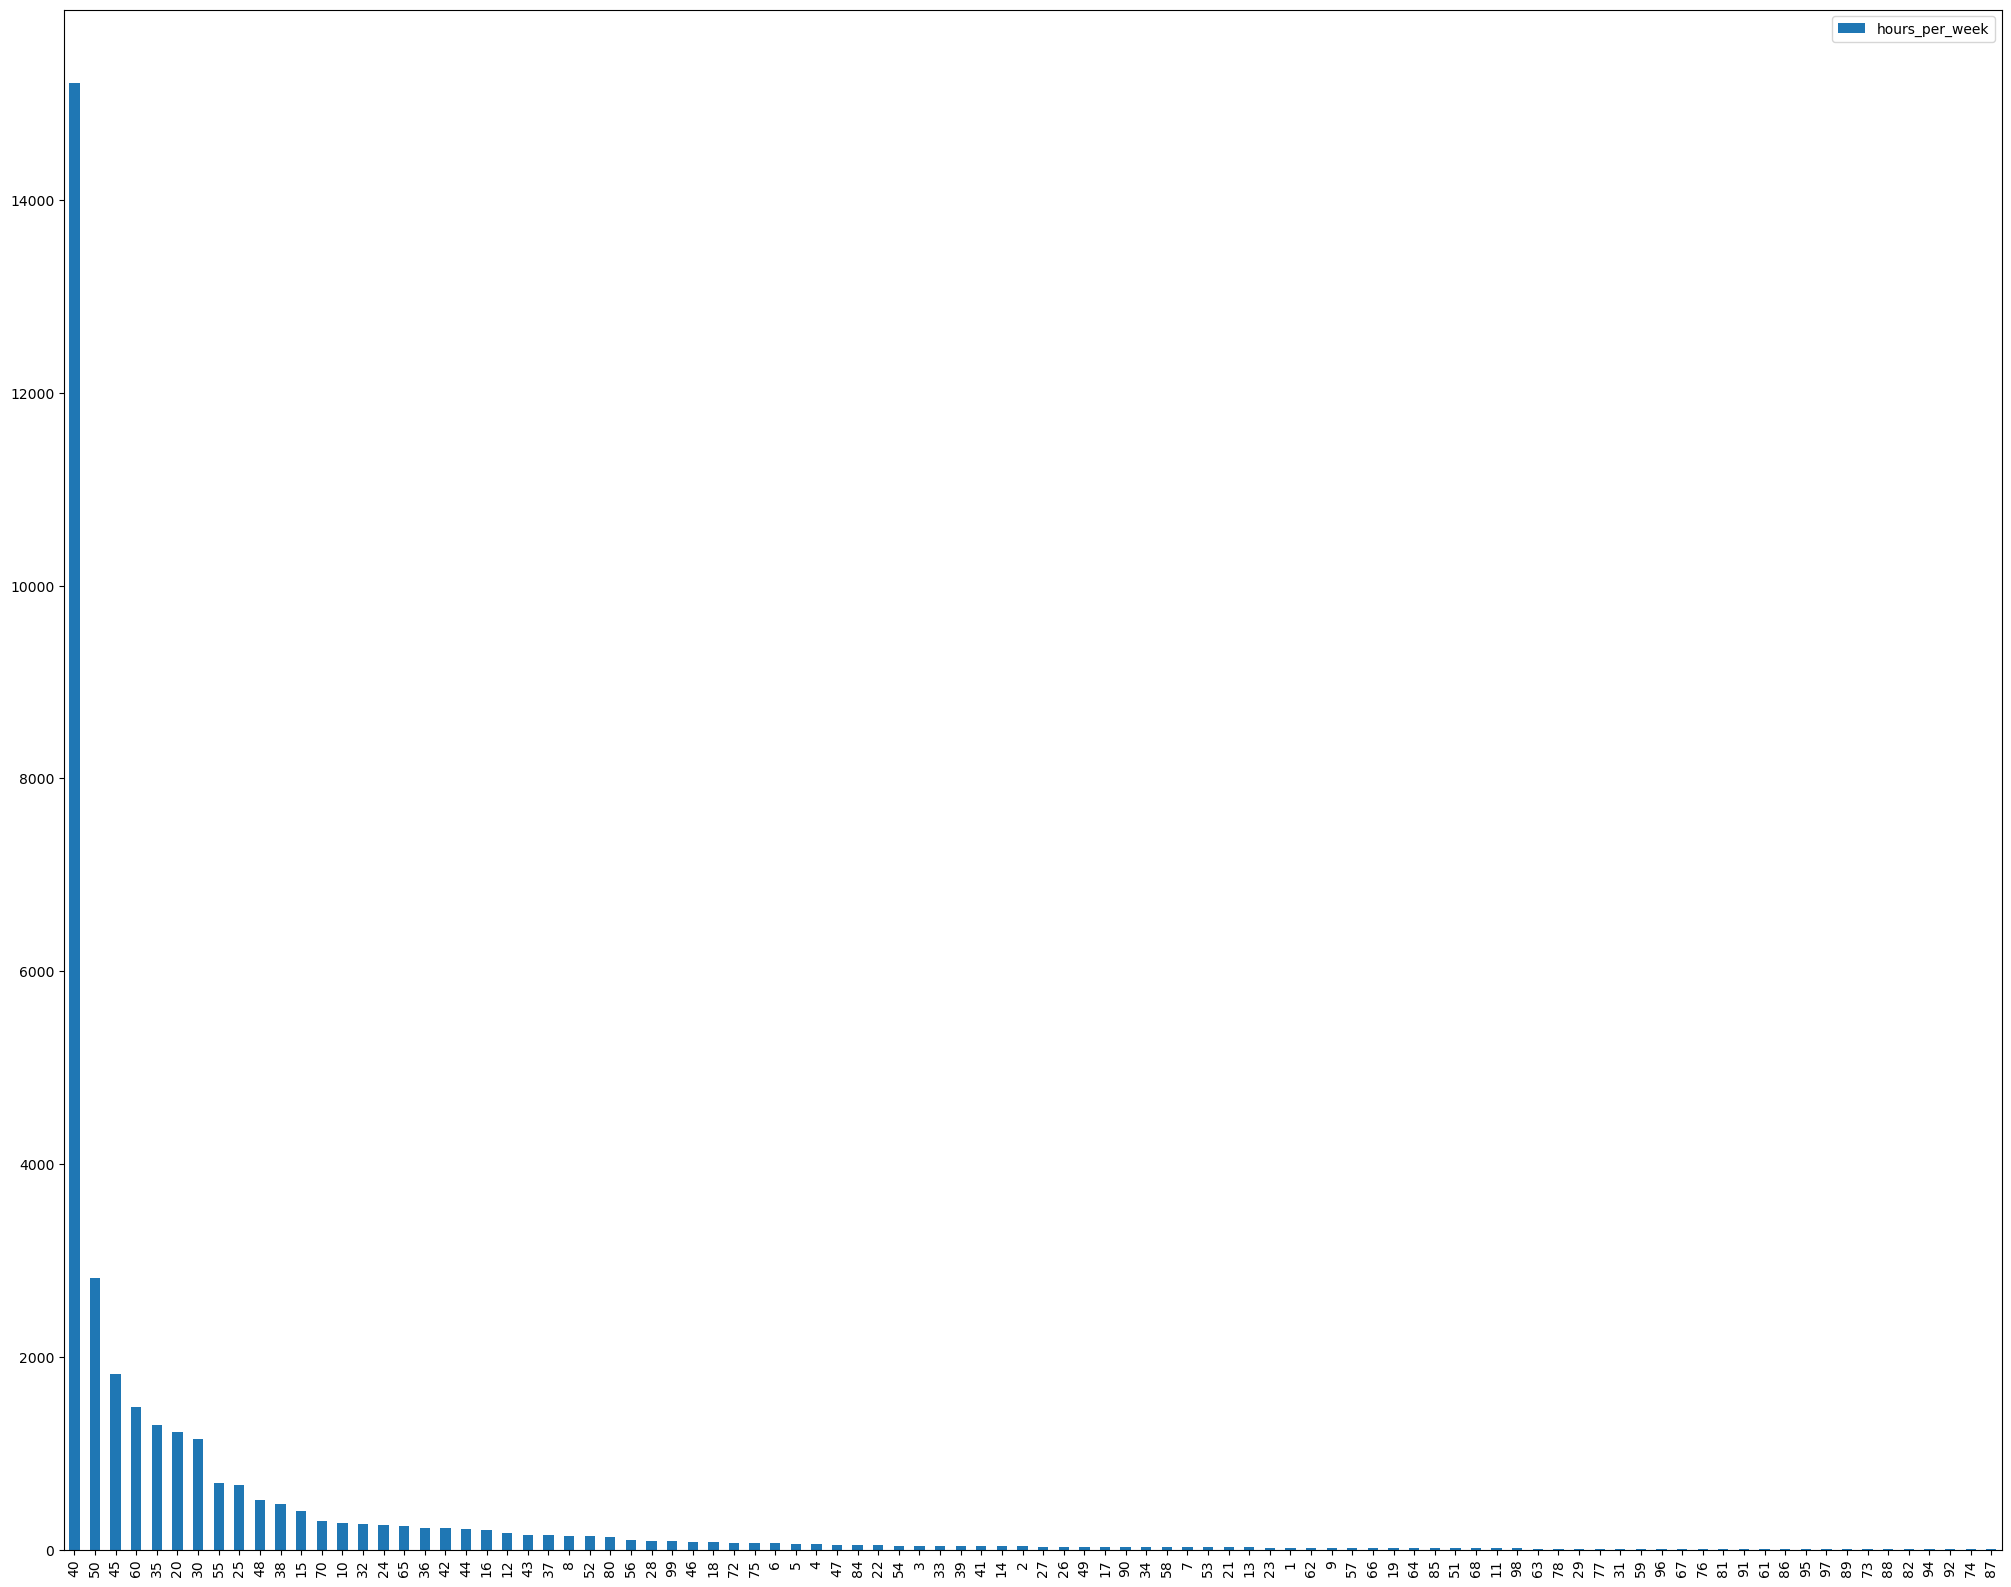

In [12]:
col = ['hours_per_week']

# Creating a larger figure
plt.figure(figsize=(25,20))  # Adjust the dimensions as needed

for c in col:
    DataFrame[c].value_counts().plot(kind='bar')
    plt.legend()
    plt.show()

# BAR

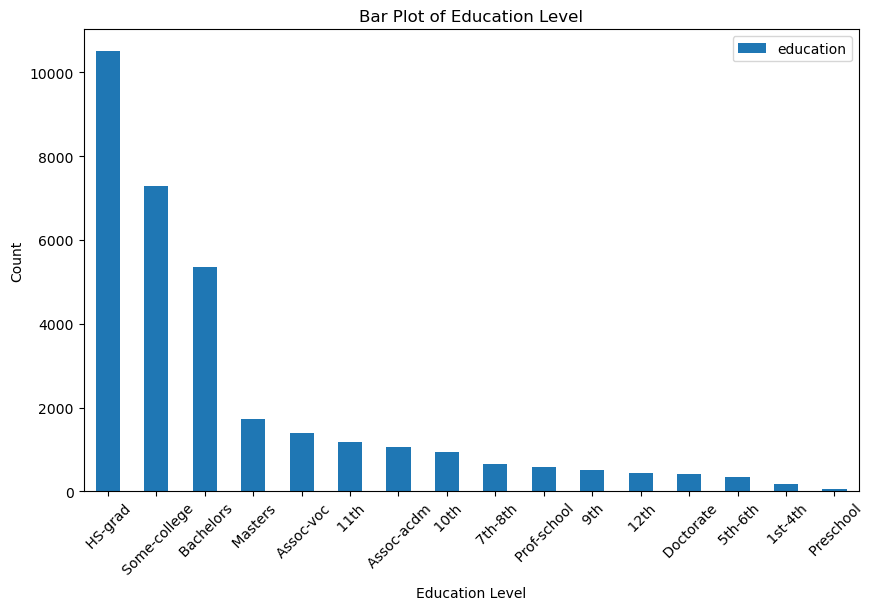

In [13]:
plt.figure(figsize=(10, 6))
DataFrame['education'].value_counts().plot(kind='bar')
plt.title('Bar Plot of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# LINE

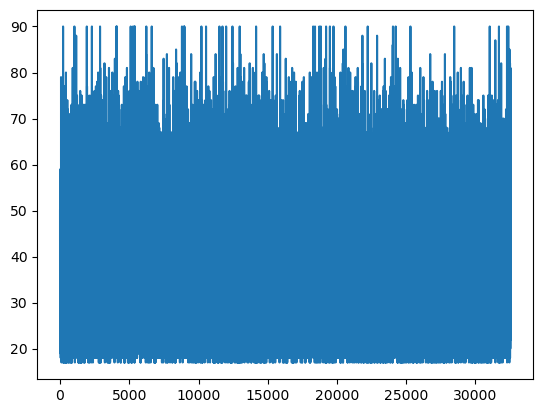

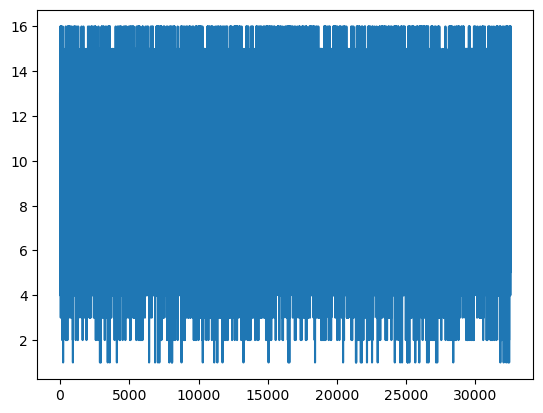

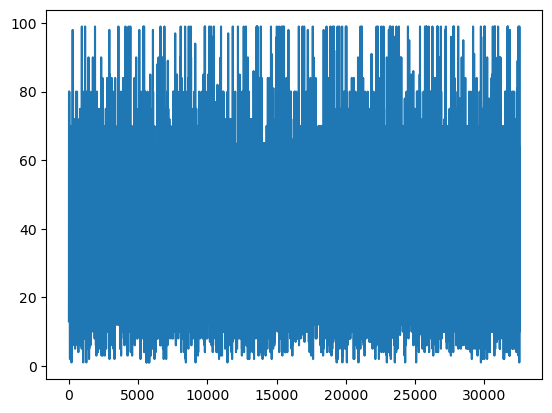

In [14]:
col=['age','education_num','hours_per_week']
for c in col:
    mat.plot(DataFrame[c])
    mat.show()

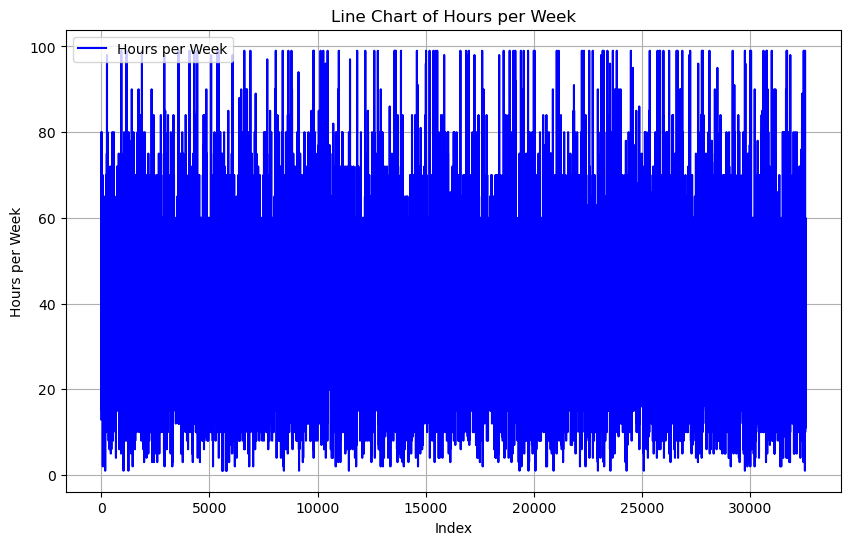

In [15]:
plt.figure(figsize=(10, 6))

# Plotting the line chart with a label and color
DataFrame['hours_per_week'].plot(kind='line', label='Hours per Week', color='blue')

# Add legend
plt.legend()

plt.title('Line Chart of Hours per Week')
plt.xlabel('Index')
plt.ylabel('Hours per Week')
plt.grid(True)
plt.show()

# Scatter

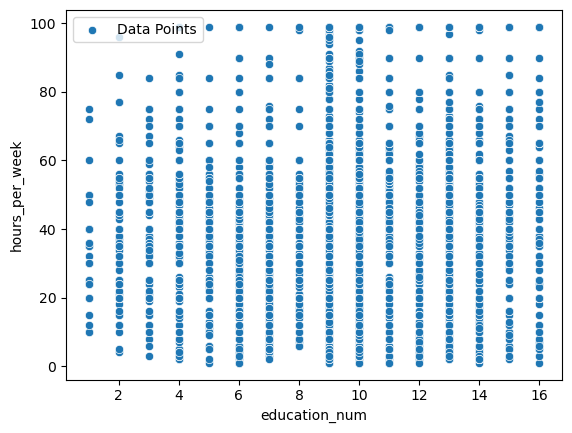

In [16]:
col = ['education_num', 'hours_per_week']

sns.scatterplot(data=DataFrame, x=col[0], y=col[1], label="Data Points")

# Adding legend
plt.legend()

plt.show()

# Histogram and Scatter plot to Box Plot

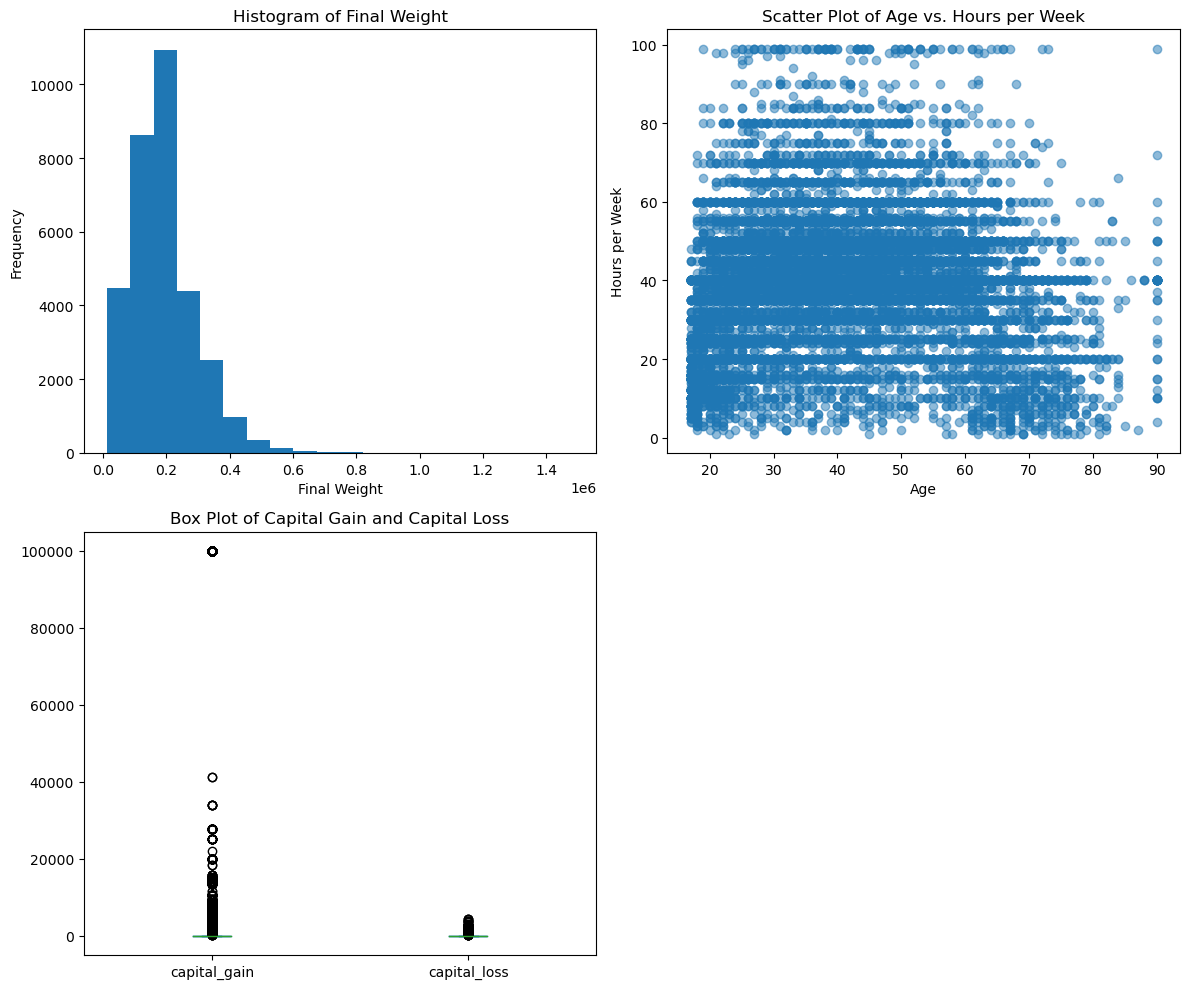

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Histogram
axes[0, 0].hist(DataFrame['fnlwgt'], bins=20)
axes[0, 0].set_title('Histogram of Final Weight')
axes[0, 0].set_xlabel('Final Weight')
axes[0, 0].set_ylabel('Frequency')

# Scatter Plot
axes[0, 1].scatter(DataFrame['age'], DataFrame['hours_per_week'], alpha=0.5)
axes[0, 1].set_title('Scatter Plot of Age vs. Hours per Week')
axes[0, 1].set_xlabel('Age')
axes[0, 1].set_ylabel('Hours per Week')

# Box Plot
DataFrame[['capital_gain', 'capital_loss']].plot(kind='box', ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Capital Gain and Capital Loss')

# Empty subplot for better layout
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

# HEATMAP

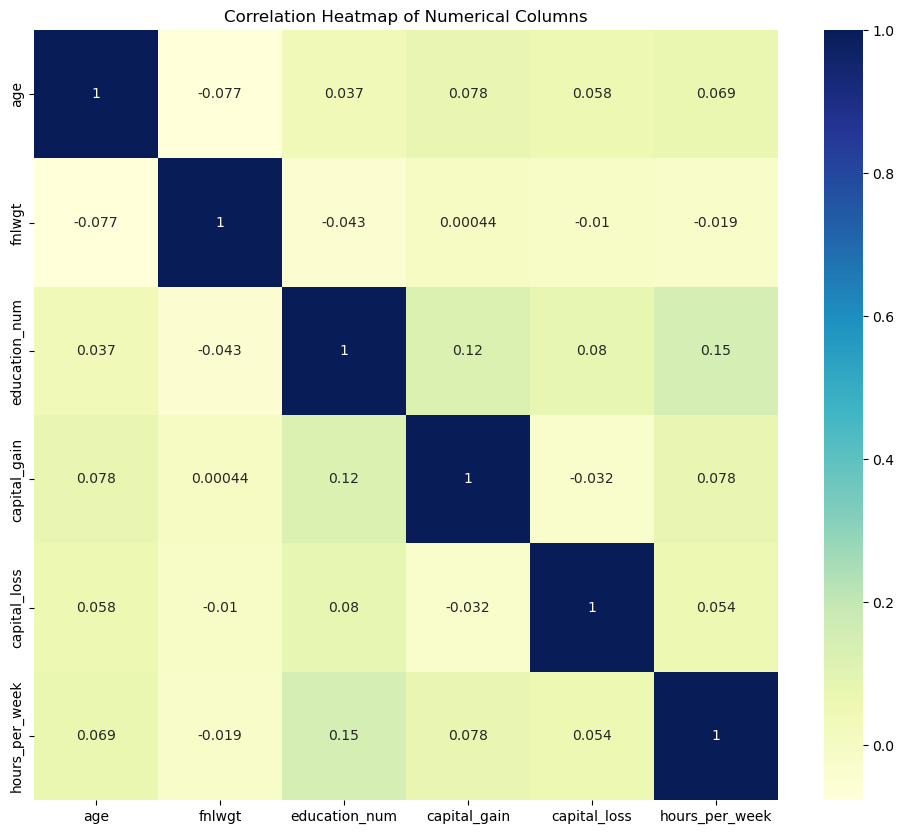

In [18]:
# Select numerical columns for heatmap
numerical_columns = DataFrame.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
correlation_matrix = numerical_columns.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

# Regression Line

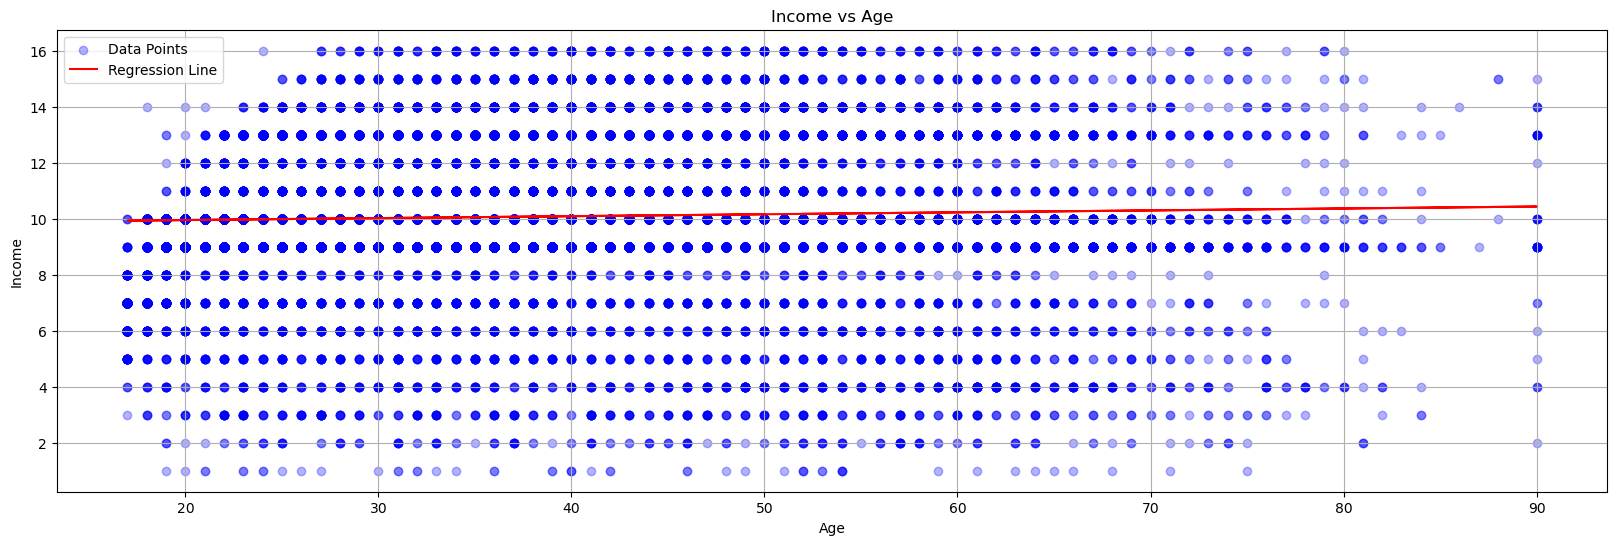

In [19]:
# Plotting
plt.figure(figsize=(20, 6))

# Extracting data
X = DataFrame['age'].values.reshape(-1, 1)  # Feature (age)
y = DataFrame['education_num'].values             # Target

# Fit linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Plotting the data points
plt.scatter(X, y, color='blue', alpha=0.3, label='Data Points')

# Plotting the regression line
plt.plot(X, regression_model.predict(X), color='red', label='Regression Line')

plt.title('Income vs Age')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.grid(True)
plt.show()

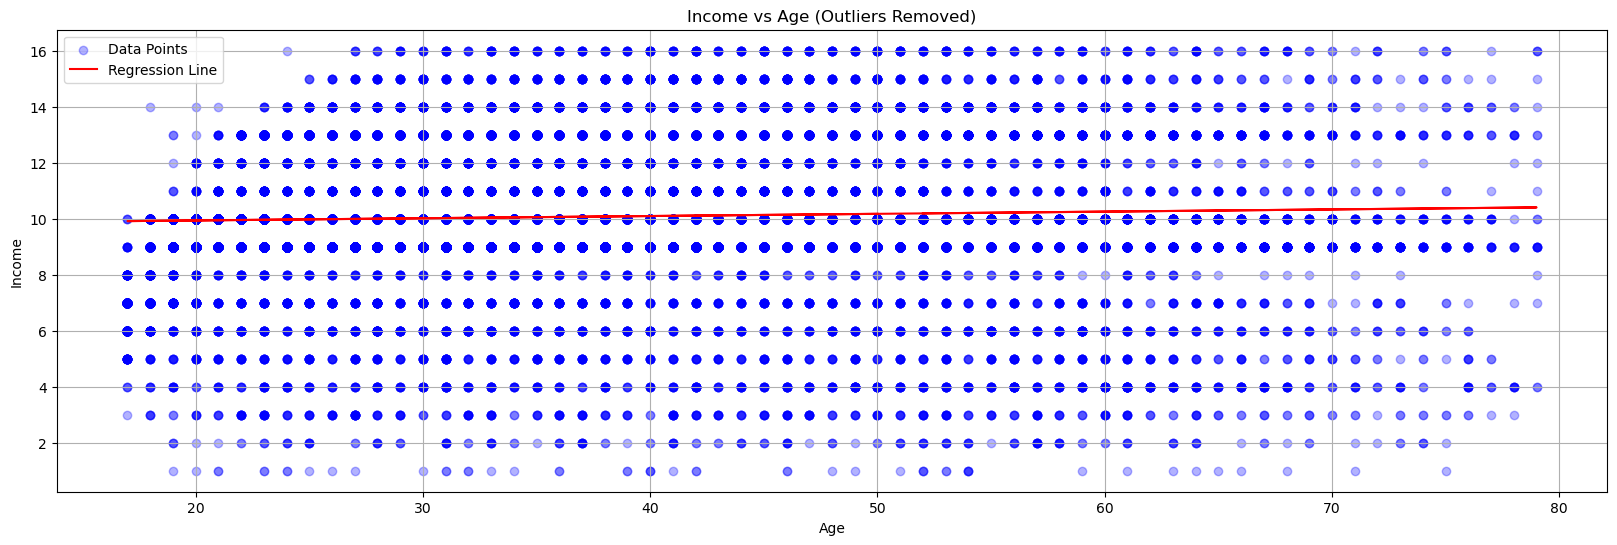

In [20]:
# Calculate mean and standard deviation
mean_age = DataFrame['age'].mean()
std_dev_age = DataFrame['age'].std()

# Calculate z-scores manually
z_scores_manual = np.abs((DataFrame['age'] - mean_age) / std_dev_age)

# Setting threshold for outliers
threshold = 3

# Filtering out outliers
filtered_data = DataFrame[(z_scores_manual < threshold)]

# Extracting filtered data
X_filtered = filtered_data['age'].values.reshape(-1, 1)  # Feature (age)
y_filtered = filtered_data['education_num'].values       # Target

# Fit linear regression model on filtered data
regression_model_filtered = LinearRegression()
regression_model_filtered.fit(X_filtered, y_filtered)

# Plotting the filtered data points
plt.figure(figsize=(20, 6))
plt.scatter(X_filtered, y_filtered, color='blue', alpha=0.3, label='Data Points')

# Plotting the regression line on filtered data
plt.plot(X_filtered, regression_model_filtered.predict(X_filtered), color='red', label='Regression Line')

plt.title('Income vs Age (Outliers Removed)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.grid(True)
plt.show()

In [21]:

# Predictions on original data
y_pred_original = regression_model.predict(X)

# Calculate metrics for original data
mae_original = mean_absolute_error(y, y_pred_original)
mse_original = mean_squared_error(y, y_pred_original)
r2_original = r2_score(y, y_pred_original)

print("Metrics for original data:")
print("Mean Absolute Error (MAE):", mae_original)
print("Mean Squared Error (MSE):", mse_original)
print("R-squared (R^2) Score:", r2_original)

# Predictions on filtered data
y_pred_filtered = regression_model_filtered.predict(X_filtered)

# Calculate metrics for filtered data
mae_filtered = mean_absolute_error(y_filtered, y_pred_filtered)
mse_filtered = mean_squared_error(y_filtered, y_pred_filtered)
r2_filtered = r2_score(y_filtered, y_pred_filtered)

print("\nMetrics for filtered data:")
print("Mean Absolute Error (MAE):", mae_filtered)
print("Mean Squared Error (MSE):", mse_filtered)
print("R-squared (R^2) Score:", r2_filtered)


Metrics for original data:
Mean Absolute Error (MAE): 1.9009520245668687
Mean Squared Error (MSE): 6.609797511743833
R-squared (R^2) Score: 0.0013342102859779104

Metrics for filtered data:
Mean Absolute Error (MAE): 1.8997625204074289
Mean Squared Error (MSE): 6.586195871375076
R-squared (R^2) Score: 0.0016813722722610613
